# Classificatiom Model 3: Random Forest

***
Let's develop our random forest model for the laundromat use case. 


In [11]:
# Import necessary Python libraries here ...
# ...
# ...
# ...

# Loading the dataset from the /data folder here 
data_path  = ?

# Read your csv file here ...
currentdf  = ???

# Allocate your training data and label 
x = ?
y = ?

# Splitting dataset into 75% for training and 25% for testing here ...
# ...
# ...

# Display the features and label from the training set 
print(?)
print(?)

# Insert code to standardize your dataset here ...
# ...
# ...


     index_col       avC         avP       sdC         sdP          avR  maxC  \
432          3  3.595600  792.930000  3.332669  786.913383   399.232039  7.23   
22           9  1.616815  329.370370  2.485054  583.668067   637.157143  1.76   
620         14  1.305465  254.702326  2.232888  529.072646   604.123431  0.66   
963          0  0.284667   34.533333  0.227744   33.000244  1429.358887  0.77   
188          9  1.484593  298.003704  2.357156  558.706609   623.840883  1.84   
..         ...       ...         ...       ...         ...          ...   ...   
360         21  0.906095  167.071429  1.721403  405.103331   871.333092  0.09   
466         15  1.292000  256.215556  2.277856  534.821437   658.162380  1.30   
299          0  2.612000  574.333333  3.216506  759.213038   753.064179  7.25   
493         20  1.080317  202.135000  1.919027  450.266332   678.029294  2.49   
527          9  1.641481  339.711111  2.584596  619.005346   585.429776  0.59   

     maxP     stdCR       s

Scikit-learn library usually give a good default parameters for you to work on. You may refer to https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html for the different types of parameters available for random forest classifier. 


In [12]:
from sklearn.?? import ??Classifier
from sklearn.metrics import accuracy_score 

# define the tree depths to evaluate
values = [i for i in range(0, 10)]
mdepth = [1, 3, 4, 5, 6, 7, 8, 9, 10, 11]
train_scores, test_scores = list(), list()

for i in values:
    # Create an instance of the predictor
    rf = RandomForestClassifier(n_estimators=??,
                            max_depth=??,
                            random_state=??)
     
    # Use the training data to train the predictor
    rf.fit(X_train_sc, y_train)
    
    # Predicting on the train dataset
    y_pred_train = rf.predict(X_train_sc)   
    train_acc = accuracy_score(y_train, y_pred_train)
    train_scores.append(train_acc)
    
    # Predicting on the test dataset
    y_pred_test = rf.predict(X_test_sc)    
    test_acc = accuracy_score(y_test, y_pred_test)
    test_scores.append(test_acc)
    

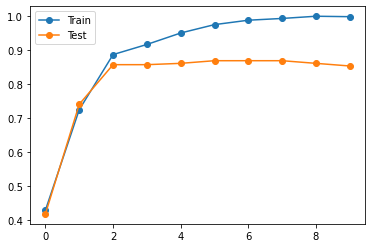

In [13]:
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()


We get approximately 0.85 or 85% for the test set, which is not too far from what we got from the other models.

***
## Training vs Testing Error

As you have learnt 3 very useful classifiers, it is time to evaluate their accuracy on the testing set. In the training set, the 3 models appear to give us about the same arracy of around 80% - 90% range. However, we need a reference point to determine whether this 80% is good or bad.

We can compare the random forest model with the other two classifiers using the testing data:


In [14]:
# Retrain the KNN model with k=6
from sklearn.?? import ??Classifier
knn = KNeighborsClassifier(n_neighbors=??)
knn.fit(X_train, y_train) 

# Retrain the decision treen model with max_depth=6
from sklearn.?? import ??Classifier
class_tree = DecisionTreeClassifier(max_depth=??,
                                   min_samples_split=??) 
class_tree.fit(X_train, y_train)

# Retrain the random forest model with max_depth=6
rf = RandomForestClassifier(n_estimators=??,
                            max_depth=??,
                            random_state=??)
rf.fit(X_train, y_train)

# Prepare the data frame for evaluation metrics
accuracies = pd.DataFrame(columns=['Train', 'Test'], index=["KNN", 'DecisionTree', 'RandomForest'])
model_dict = {'KNN': knn, 'DecisionTree': class_tree, 'RandomForest': rf}

# Evaluate the accuraccies of the 3 predictive models
for name, model in model_dict.items():
    accuracies.loc[name, 'Train'] = accuracy_score(y_true=y_train, y_pred=model.predict(X_train))                                                                                                                  
    accuracies.loc[name, 'Test'] = accuracy_score(y_true=y_test, y_pred=model.predict(X_test))   

# Show results in percentage
100*accuracies  
  


,Train,Test
KNN,81.500647,67.829457
DecisionTree,89.133247,83.333333
RandomForest,94.954722,86.046512


Let use the bar graph to virtally compare the 3 predictive models to evaluate the accuracy of both training and testing sets.

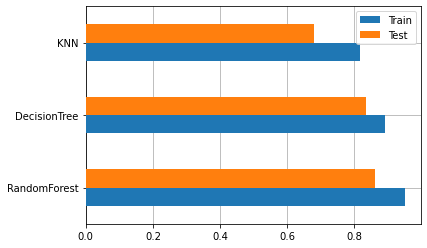

In [15]:
fig, ax = plt.subplots()
accuracies.sort_values(by='Test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0); 


From the accuracy results, discuss with your team on the following questions:

1. Which predictive model would your team choose to adopt? And why? 
2. How will you improve the results of the accuracy further? 
3. Is Accuracy result alone is sufficient for you to justify that it is indeed a good predictive model? Why or why not? 

Your response here ...

## Model Evaluation

### Confusion Matrix

Let's compute the confusion matrix for this Decision Tree model for the laudromat use case.


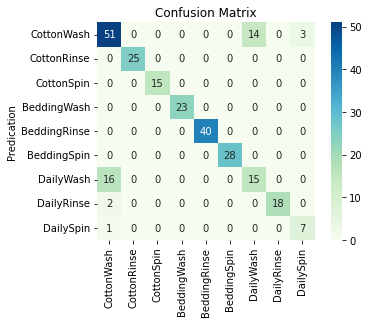

Model Score 0.1744186046511628


In [16]:
from sklearn.?? import ??

# Determine the accuracy of the model
score = rf.score(X_test_sc, y_test)
class_label=['CottonWash', 'CottonRinse', 'CottonSpin', 'BeddingWash', 'BeddingRinse', 'BeddingSpin',
                 'DailyWash', 'DailyRinse','DailySpin']

rf.fit(??, ??)
rf.predict(??)
cm = confusion_matrix(y_test, rf.predict(??), labels=class_label)
#
axes = sns.heatmap(cm, square=True, annot=True, fmt ='d', cbar=True, cmap=plt.cm.GnBu)
axes.set_ylabel('Actual')
axes.set_ylabel('Predication')
tick_marks = np.arange(len(class_label)) + 0.5
axes.set_xticks(tick_marks)
axes.set_xticklabels(class_label, rotation = 90)
axes.set_yticks(tick_marks)
axes.set_yticklabels(class_label, rotation = 0)
axes.set_title('Confusion Matrix')
plt.show()

print("Model Score {}" .format( score) )


Finally, let's calculate the Accuracy, Precision, Recall and F1 Score metrics for the Random Forest model.


In [17]:
from sklearn.metrics import ??, ??, ??

rf =??Classifier(n_estimators=??,
                            max_depth=9,
                            random_state=??)
rf.fit(??, ??)

accuracy = accuracy_score(??, y_pred_test)
precision = precision_score(??, y_pred_test, average='macro')
recall = recall_score(??, y_pred_test, average='macro')
f1 = f1_score(??, y_pred_test, average='macro')

print ("Accuracy: {:0.1f}%, Precision: {:0.1f}%, Recall: {:0.1f}%, F1 Score: {:0.1f}%".format(100*accuracy, 100* precision, 100*recall, 100*f1))


Accuracy: 85.3%, Precision: 87.5%, Recall: 89.9%, F1 Score: 88.3%


Finally, are the 4 metrics calculated for random forest better or worst than KNN and Decision Tree models? Which model will you propose for your stakeholder to adopt? Justify your reasons for choosing it?


Your response here ... 


You may save your random forest model for future use. 


In [18]:
import pickle as pk

model_filename= "./model/rf.mdl"
with open(model_filename, "wb") as file:
    pk.dump(rf, file)
print("Model Saved")


Model Saved


***